In [6]:
#=
12.12 Least Squares Placement

- 2-vectors p1,...,pN represent locations of N objects
- The last 'K' of these locations are fixed and given
- Goal: choose locations of the first N-K objects
- Undirected graph: an edge between 2 objects means we would like them to be close to each other
- Choose locations p1,...,pN-K as to minimize the sum of squares of the distances between
  objects connected by an edge
- ||pi1 - pj1||^2 + ... + ||piL - pjL||^2 are the edges
=#

In [7]:
#=
I solved the first 2 parts on paper.

c. Solve this least squares placement problem
=#

# N = 10, K = 4, L = 13
# 10 locations
# Last 4 locations are fixed
# 13 edges

N = 10
K = 4
L = 13

free_idx = 1:(N-K)
fixed_idx = (N-K+1):N

# Fixed positions
p_fixed = [
    0.0 0.0; # p7
    0.0 1.0; # p8
    1.0 1.0; # p9
    1.0 0.0  # p10
]

# Edges
edges = [
    (1,3), (1,4), (1,7),
    (2,3), (2,5), (2,8), (2,9),
    (3,4), (3,5),
    (4,6),
    (5,6), 
    (6,9), (6,10)
]

L = length(edges)


# Buld incidence matrix 'B'
# Enumerate gives both the index and the value at the same time
B = zeros(N,L)
for (k, (i,j)) in enumerate(edges)
    B[i, k] = -1
    B[j, k] = 1
end


# Partition 'B' into Bm (free node rows) and Bf (fixed node rows)
Bm = B[free_idx, :]
Bf = B[fixed_idx, :]


# Extract fixed coordinates u_f (x) and v_f (y)
u_f = p_fixed[:, 1]
v_f = p_fixed[:, 2]


# Build 'b' vector blocks
b_u = - (Bf') * u_f
b_v = - (Bf') * v_f


# Build 'b' vector
b = vcat(b_u, b_v)


# Build block matrix 'A'
Lm = size(Bm, 1)
A_top = hcat(Bm', zeros(L, Lm))
A_bot = hcat(zeros(L, Lm), Bm')
A = vcat(A_top, A_bot)


# Solve least squares A * x = b
x = A \ b


# Extract u_m and v_m
# x coordinates
u_m = x[1:Lm]
# y coordinates
v_m = x[Lm+1:2*Lm]



# Reassemble full node coordinates u and v (order nodes 1..10)
u = vcat(u_m, u_f)
v = vcat(v_m, v_f)

# Print results
println("Free node x coords (u_m): ", round.(u_m, digits=5))
println("Free node y coords (v_m): ", round.(v_m, digits=5))

Free node x coords (u_m): [0.35531, 0.53114, 0.51282, 0.55311, 0.61172, 0.79121]
Free node y coords (v_m): [0.34799, 0.79853, 0.5641, 0.47985, 0.63004, 0.52747]


┌ Warning: Unused font kwarg: bbox
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\components.jl:303
┌ Warning: Unused font kwarg: bbox
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\components.jl:303
┌ Warning: Unused font kwarg: bbox
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\components.jl:303
┌ Warning: Unused font kwarg: bbox
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\components.jl:303
┌ Warning: Unused font kwarg: bbox
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\components.jl:303
┌ Warning: Unused font kwarg: bbox
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\components.jl:303
┌ Warning: Unused font kwarg: bbox
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\components.jl:303
┌ Warning: Unused font kwarg: bbox
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\components.jl:303
┌ Warning: Unused font kwarg: bbox
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\components.jl:303
┌ Warning:

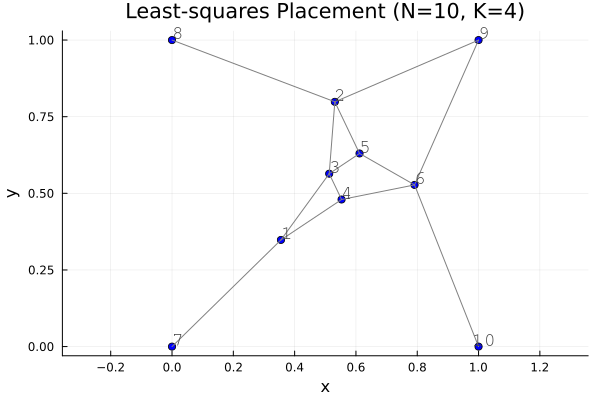

In [8]:
using Plots

# --- Plot blue dots for all nodes ---
plt = scatter(u, v,
    color=:blue,
    marker=:circle,
    label=false,
    xlabel="x",
    ylabel="y",
    title="Least-squares Placement (N=10, K=4)",
    aspect_ratio=:equal)

# --- Draw gray edges ---
for (i, j) in edges
    plot!(plt, [u[i], u[j]], [v[i], v[j]], color=:gray, linewidth=1, label=false)
end

# --- Label nodes more clearly ---
for i in 1:N
    annotate!(
        plt,
        u[i] + 0.02,  # slight x offset
        v[i] + 0.02,  # slight y offset
        text(string(i), :black, 10, "bold", :center, bbox=:white)
    )
end

# --- Show plot ---
display(plt)

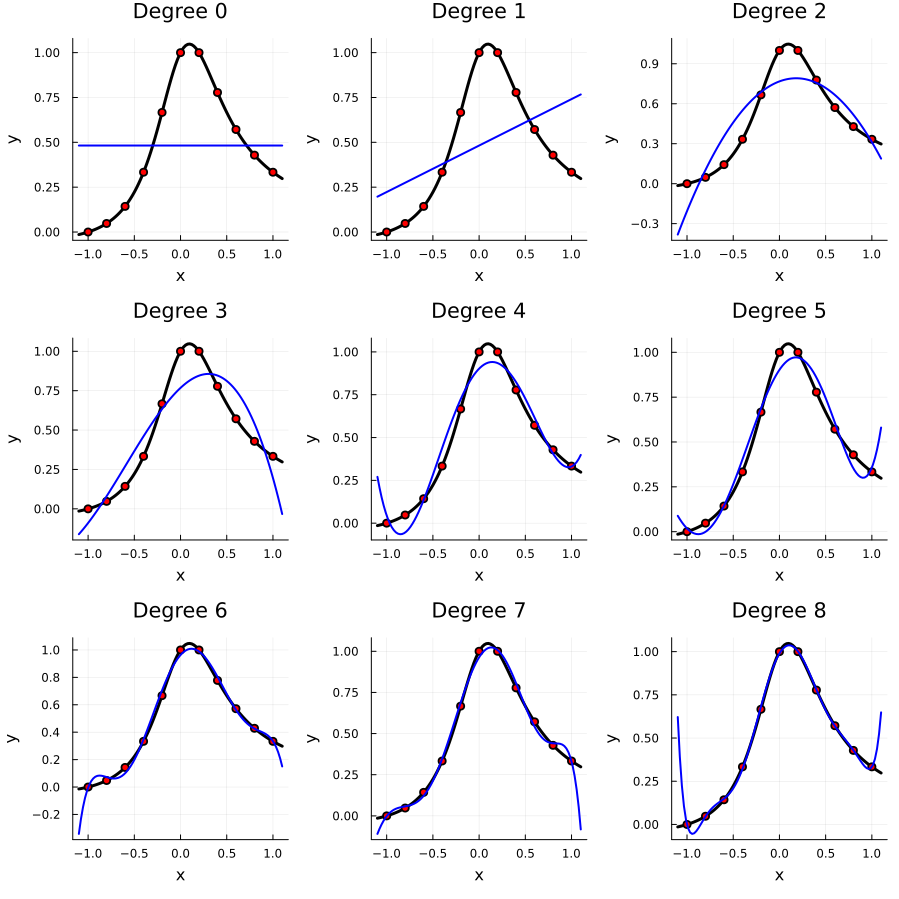

In [9]:
# 13.17 Fitting a Rational Function With a Polynomial

# x1,..., x11 are 11 points uniformly spaced in the inverval [-1,1]
x = zeros(11)

for i in 1:11
    x[i] = -1.0 + 0.2 * (i-1)
end


# yi = (1+xi)/(1+5xi^2)
y = zeros(11)

for i in 1:11
    y[i] = (1+x[i])/(1+5*x[i]^2)
end


# 100 points from -1.1 to 1.1 for smoother plotting
x_plot = range(-1.1, 1.1, length=100)
# 'y' function on 100 'x' points
y_true = [(1 + xi)/(1 + 5*xi^2) for xi in x_plot]

# Prepare a list to hold each subplot
# So we can put all degrees side by side
plots_list = []


# Find the least squares fit of polynomials of degree 0, 1, ..., 8 to these points

# For each degree
for i in 0:8
    # Construct Vandermonde matrix for polynomial degree 'd'
    # Each column is each of the 'x' values multiplied by the current degree
    # Construct 1 column at a time, put them together with hcat
    A = hcat([x .^ j for j in 0:i]...)

    # Least squares solution
    θ = A \ y

    # Doing the same thing as above, but with 100 points so our plots can be smoove
    A_plot = hcat([x_plot .^ j for j in 0:i]...)
    # Fitted y-values
    y_fit = A_plot * θ

    # Create a plot for this degree
    # True function
    p = plot(x_plot, y_true, label="", lw=3, color=:black)
    # 11 points
    scatter!(p, x, y, label="", color=:red)
    # Line of best fit
    plot!(p, x_plot, y_fit, label="", lw=2, color=:blue)
    
    xlabel!(p, "x")
    ylabel!(p, "y")
    title!(p, "Degree $i")
    
    push!(plots_list, p)
end

# Display all plots in a 3x3 grid
plot(plots_list..., layout=(3,3), size=(900,900))

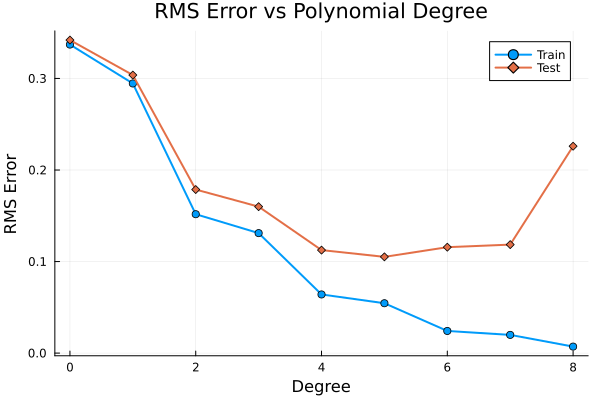

In [10]:
#=
- Generate a test data set
- Plot the RMS error of the polynomial fits found above on this test data set
- On the same plot, show the RMS error of the polynomial fits on the training data set
- Suggest a reasonable value for the degree of the polynomial fit, based on the RMS fits
on the training and test data
=#


# Test data set
# u1,...,u10 uniformly spaced over [-1.1, 1.1]
u = [-1.1 + 0.244*(i-1) for i in 1:10]
# vi = (1+ui)/(1 + 5ui^2)
v = [(1 + ui)/(1 + 5*ui^2) for ui in u]

# For storing RMS of training and test data sets for each degree
rms_train = zeros(9)
rms_test = zeros(9)


# For each degree
for i in 0:8
    # Construct Vandermonde matrix for polynomial degree 'd'
    # Each column is each of the 'x' values multiplied by the current degree
    # Construct 1 column at a time, put them together with hcat
    # For the training data
    A_train = hcat([x .^ j for j in 0:i]...)

    
    # Least squares solution
    θ = A_train \ y

    
    # Fitted 'y' value for training data
    y_fit_train = A_train * θ
    # Storing RMS error on training data
    rms_train[i+1] = sqrt(sum((y_fit_train - y).^2) / length(y))


    # Vandermonde matrix for the test data
    A_test = hcat([u .^ j for j in 0:i]...)
    # Fitted 'y' value for test data
    y_fit_test = A_test * θ
    # Storing RMS error on test data
    rms_test[i+1] = sqrt(sum((y_fit_test - v).^2) / length(v))
end

        
using Plots

degrees = 0:8

plot(degrees, rms_train, marker=:circle, lw=2, label="Train")
plot!(degrees, rms_test, marker=:diamond, lw=2, label="Test")
xlabel!("Degree")
ylabel!("RMS Error")
title!("RMS Error vs Polynomial Degree")

In [11]:
#=
This graph suggests using degree four or five. These two degrees are where the RMS is lowest
for the test and training data sets.
=#

In [12]:
#=
14.6 - Polynomial Classifier With One Feature
=#

# (a). Evaluate the error rate on the training data set. Does the error rate decrease when
# you increase the degree?

# Generate 200 points uniformly spaced in the interval [-1,1]
x = range(-1, 1, length=200)

y = zeros(200)

for i in 1:200
    if (x[i] >= -0.5 && x[i] < 0.1) || (x[i] >= 0.5)
        y[i] = 1
    else
        y[i] = -1
    end
end


# For storing RMS of training data sets for each degree
rms_train = zeros(9)


# For each degree
for i in 0:8
    # For the training data
    A_train = hcat([x .^ j for j in 0:i]...)

    
    # Least squares solution
    θ = A_train \ y

    
    # Predicted 'y' value for training data
    y_pred_train = A_train * θ

    
    #Takes the sign of each number
    # Basically turns positive numbers to +1 and negative numbers to -1
    y_class_train = sign.(y_pred_train)

    # Checks if prediction matches actual value
    # Using mean converts into a fraction of incorrect points
    rms_train[i+1] = mean(y_class_train .!= y)
end

        
using Plots

degrees = 0:8

plot(degrees, rms_train, marker=:circle, lw=2, label="")
xlabel!("Degree")
ylabel!("RMS Error")
title!("RMS Error vs Polynomial Degree")

LoadError: UndefVarError: `mean` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing Statistics in the current active module Main
Hint: a global variable of this name may be made accessible by importing StatsBase in the current active module Main

In [13]:
# The error rate does decrease when you increase the degree. However, the error does increase
# as we go from degree 3 to degree 4. This contrasts with RMS error in least swuares data
# fitting, which never increases as we add basis functions. 

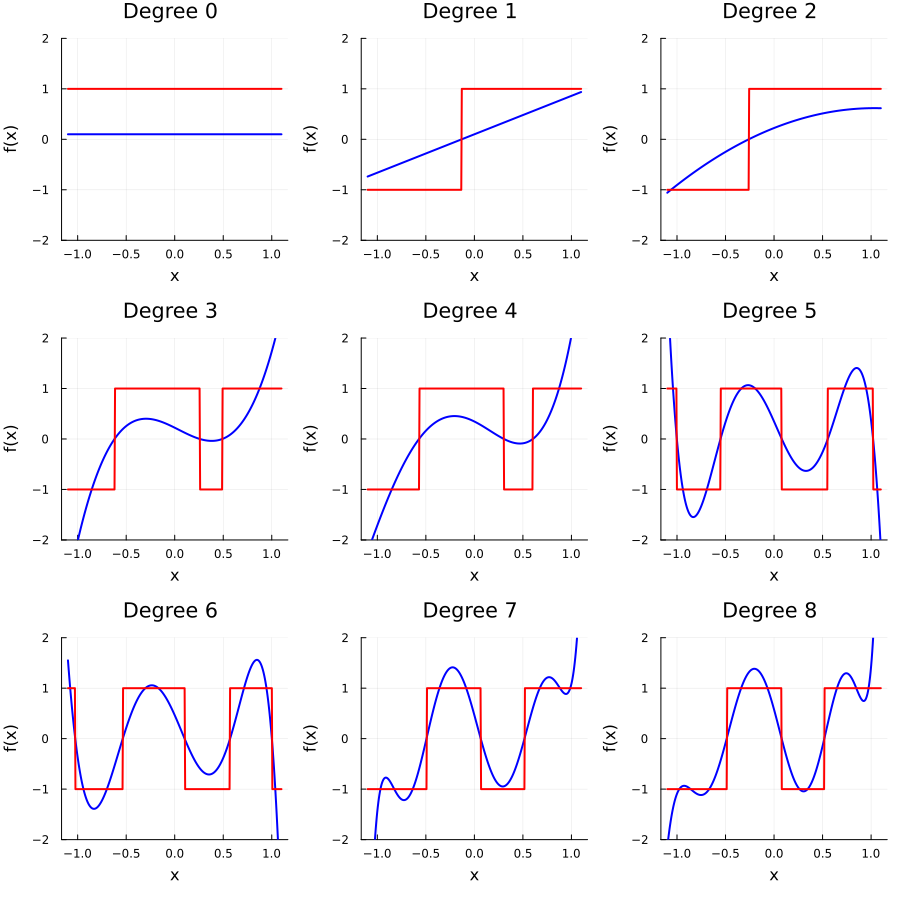

In [14]:
#=
(b.) For each degree, plot the polynomial ̃f(x) and the classifier ̃f(x) = sign(̃f(x))
=#


# 400 points from -1.1 to 1.1 for smoother plotting
x_plot = range(-1.1, 1.1, length=400)

# Prepare a list to hold each subplot
plots_list = []

for i in 0:8
    # Vandermonde matrix
    A = hcat([x .^ j for j in 0:i]...)
    # Least Squares solution
    θ = A \ y

    # Vandermonde matrix for the plot
    A_plot = hcat([x_plot .^ j for j in 0:i]...)
    # Predicted 'y' value
    y_pred = A_plot * θ
    y_class = sign.(y_pred)

    # Create subplot
    p = plot(x_plot, y_pred, lw=2, label="", color=:blue,
             xlabel="x", ylabel="f(x)", ylim=(-2, 2))
    plot!(p, x_plot, y_class, lw=2, label="", color=:red)
    title!(p, "Degree $i ")

    push!(plots_list, p)
end

# Combine into a 3×3 grid
plot(plots_list..., layout=(3,3), size=(900,900))

In [15]:
#=
ˆf(x) = sign( ̃f(x))
Red line: Final prediction of either -1 or 1 when given an 'x' value

̃f(x)
Blue line: How the model is approximating the pattern in the data
=#

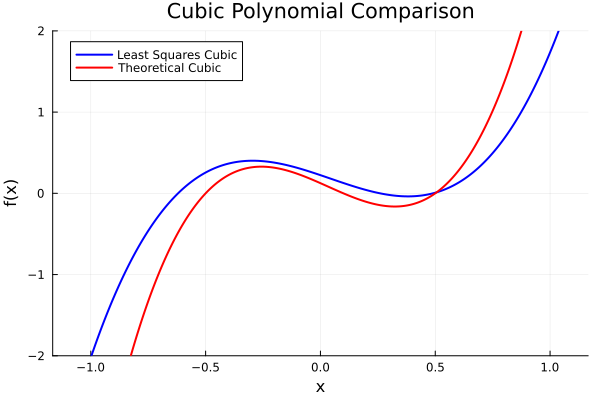

In [16]:
#=
(c.) It is possible to classify this data perfectly using a classifier ˆf(x) = sign( f(x))
and a cubic polynomial ̃f(x) = c(x + 0.5)(x − 0.1)(x − 0.5), for any positive 'c'. Compare
this classifier with the least squares classifier of degree 3 that you found and explain
why there is a difference.
=#

# 400 points from -1.1 to 1.1 for smoother plotting
x_plot = range(-1.1, 1.1, length=400)

# Vandermonde matrix
A = hcat([x .^ j for j in 0:3]...)
# Least Squares solution
θ = A \ y

# Vandermonde matrix for the plot
A_plot = hcat([x_plot .^ j for j in 0:3]...)
# Predicted 'y' value
y_pred = A_plot * θ
# Assigns each predicted 'y' value to -1 or +1
y_class = sign.(y_pred)

c = 5.0
f_theoretical = c .* (x_plot .+ 0.5) .* (x_plot .- 0.1) .* (x_plot .- 0.5)

# Plot both curves
p = plot(
    x_plot, y_pred,
    lw=2, color=:blue, label="Least Squares Cubic",
    xlabel="x", ylabel="f(x)", ylim=(-2, 2),
    title="Cubic Polynomial Comparison"
)

plot!(p, x_plot, f_theoretical, lw=2, ls=:solid, color=:red, label="Theoretical Cubic")


display(p)

In [17]:
#=
Why there is a difference:

The least squares classifier fits a polynomial to the training data by minimizing the squared
error ̃(f(x[i]) - y[i])^2 for i = 1 to n. This is not the same as minimizing the classification
error sign( ̃(f(x[i])) - y[i])^2 / (4N) for i = 1 to n. Put simply, the least squares cubic tries
to make x[i] as numerically close to y[i] as possible while the theoretical cubic only cares
about signs.

=#

┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\backends\gr.jl:530
┌ Warning: Multiple series with different line color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\backends\gr.jl:530


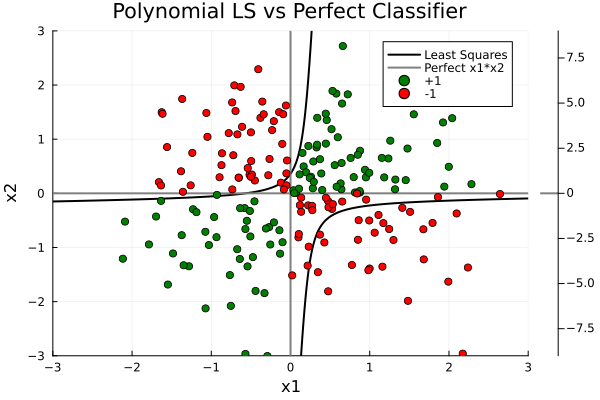

┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\backends\gr.jl:530
┌ Warning: Multiple series with different line color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\backends\gr.jl:530
┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\backends\gr.jl:530
┌ Warning: Multiple series with different line color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Jacks\.julia\packages\Plots\8ZnR3\src\backends\gr.jl:530


In [18]:
#=
14.7 - Polynomial Classifier with two featurs
=#

# Generate 200 random 2-vectors x1,...,x200 in a plane, from a standard normal distribution
using Random
using Statistics
using Plots

# Seed for reproducibility
Random.seed!(0)

x = randn(200, 2)

y = zeros(200)

# Get the 'y' values
for i in 1:200
    if x[i, 1] * x[i, 2] >= 0
        y[i] = 1
    else
        y[i] = -1
    end
end

# Extract x1 and x2 from 'x'
x1 = x[:, 1]
x2 = x[:, 2]


# Construct each polynomial feature column
# 1 * θ1
col1 = ones(200)
# x1 * θ2
col2 = x1
# x2 * θ3
col3 = x2
# (x1)^2 * θ4
col4 = x1 .^ 2
# x1*x2 * θ5
col5 = x1 .* x2
# (x2)^2 * θ6
col6 = x2 .^ 2

# Combine all columns to make 'A' matrix
A = hcat(col1, col2, col3, col4, col5, col6)

# Solve least squares for θ
θ = A \ y

# Predictions for 'y' values
y_pred = A * θ

# Class labels (-1 or +1)
y_class = sign.(y_pred)

# Fraction of misclassified samples
error_rate = mean(y_class .!= y)


# Grid
grid_points = 200
x1_grid = range(-3, 3, length=grid_points)
x2_grid = range(-3, 3, length=grid_points)


# f_vals matrix
f_vals = zeros(grid_points, grid_points)

# Loop over all x2 values (rows)
for i in 1:grid_points
    xi2 = x2_grid[i]
    
    # Loop over all x1 values (columns)
    for j in 1:grid_points
        xi1 = x1_grid[j]
        
        # Compute polynomial at this (x1, x2) grid point
        f_vals[i, j] = θ[1] + θ[2]*xi1 + θ[3]*xi2 +
                        θ[4]*xi1^2 + θ[5]*xi1*xi2 + θ[6]*xi2^2
    end
end


f_vals_perfect = zeros(length(x2_grid), length(x1_grid))

# Loop over all x2 (rows)
for i in 1:length(x2_grid)
    xi2 = x2_grid[i]
    
    # Loop over all x1 (columns)
    for j in 1:length(x1_grid)
        xi1 = x1_grid[j]
        
        # Compute perfect classifier value
        f_vals_perfect[i, j] = xi1 * xi2
    end
end


# Base plot
p = plot(; xlims=(-3,3), ylims=(-3,3), xlabel="x1", ylabel="x2", title="Polynomial LS vs Perfect Classifier")

# Add least squares classifier boundary as black line
plot!(p, [0,0], [0,0], color=:black, lw=2, label="Least Squares")

# Add perfect classifier boundary as a gray line
plot!(p, [0,0], [0,0], color=:gray, lw=2, label="Perfect x1*x2")

contour!(p, x1_grid, x2_grid, f_vals; levels=[0], linewidth=2, color=:black, fill=false, label="")
contour!(p, x1_grid, x2_grid, f_vals_perfect; levels=[0], linewidth=2, color=:gray, fill=false, label="")

# Add training points
scatter!(p, x1[y .== 1], x2[y .== 1], color=:green, label="+1", ms=4)
scatter!(p, x1[y .== -1], x2[y .== -1], color=:red, label="-1", ms=4)

# Show legend
plot!(p, legend=:topright)

In [19]:
println("Computed Coefficients:")
for i in 1:6
    println("0",i,": ",θ[i])
end

num_misclassified = sum(y_class .!= y)

println("Number of misclassified points: ",num_misclassified)

Computed Coefficients:
01: 0.043407250608386246
02: 0.06981511421984342
03: -0.11394918329794843
04: -0.011584176743187246
05: 0.5625711044923085
06: -0.018854636818548678
Number of misclassified points: 24


In [20]:
#=
14.1 - Trading Off False Positive and False Negative Rates

- Use the Boolean least squares classifier with skewed decesion point, described on pages
223-224, to alter the false positive and false negative rates
- The classifier is f^(x) = sign(f~(x) - a)
- f~(x) is the real-valued least squares predictor of the labels encoded +- 1
- 'a' is a constant that skews the decision point
- We will use basic regression: f~(x) = x^Tβ + v
=#

In [21]:
#=
(a.)
- Gave us a file
- Find the model parameters β and 'v' using the training data set
- Give the confusion matrix for the associated classifier (with a = 0) for both training and
test sets
- Give the error rate for the train and test sets
=#

In [22]:
# Code from online
using Random, LinearAlgebra;
Random.seed!(735);

# Number of features
n = 10;

# Number of training samples
N = 5000;

# Number of test samples
N_test = 1000;

# Generates 10 random numbers between -1 and 1
beta_true = 2 .* (rand(n) .- 0.5);
noise_level = 0.75;
true_offset = -0.75;
# 5000 training samples, each with 10 features
X_train = 2 .* (rand(N,n) .- 0.5);
# 5000 class labels, +1 or -1
y_train = sign.(X_train * beta_true .+ noise_level .* (rand(N) .- 0.5) .+ true_offset);
X_test = 2 .* (rand(N_test,n) .- 0.5);
y_test = sign.(X_test * beta_true .+ noise_level .* (rand(N_test) .- 0.5) .+ true_offset);

# You may use n,N,N_test, and the X,y training/test data
# You should not use beta_true in your solution

In [23]:
# y is approximately Xβ + v

# Add a column of ones for the bias term 'v'
X1_train = hcat(X_train, ones(N))

# Least-squares solution for the weights
θ = X1_train \ y_train

# Store the weights
beta = θ[1:n]
# Store the bias
v = θ[n+1]

# Make our predictions
# a = 0
f_train = sign.(X_train * beta .+ v)
f_test  = sign.(X_test  * beta .+ v)



1000-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
 -1.0
 -1.0
  1.0

In [24]:
for i in 1:n
    println("Weight ", i, ": ", beta[i])
end
println("Bias: ", v);

Weight 1: 0.16018824236433984
Weight 2: 0.05655606121825789
Weight 3: -0.4015930689488152
Weight 4: 0.24824443904759766
Weight 5: 0.2930557796011416
Weight 6: 0.4246449545239952
Weight 7: -0.5468308888794207
Weight 8: -0.2242072533307528
Weight 9: -0.3553317474305762
Weight 10: 0.3351676243949507
Bias: -0.5119563362790841


In [25]:
# Confusion matrix for training data set
tp_training = sum((y_train .== 1) .& (f_train .== 1))
fp_training = sum((y_train .== -1) .& (f_train .== 1))
fn_training = sum((y_train .== 1) .& (f_train .== -1))
tn_training = sum((y_train .== -1) .& (f_train .== -1))

# Error rate for training data set
err_train = sum(y_train .!= f_train) / length(y_train)

println("True Positives Training: ", tp_training)
println("False Positives Training: ", fp_training)
println("False Negatives Training: ", fn_training)
println("True Negatives Training: ", tn_training)
println("Error Rate Training: ", err_train)

True Positives Training: 960
False Positives Training: 67
False Negatives Training: 249
True Negatives Training: 3724
Error Rate Training: 0.0632


In [26]:
# Confusion matrix for test data set
tp_test = sum((y_test .== 1) .& (f_test .== 1))
fp_test = sum((y_test .== -1) .& (f_test .== 1))
fn_test = sum((y_test .== 1) .& (f_test .== -1))
tn_test = sum((y_test .== -1) .& (f_test .== -1))

# Error rate for test data set
err_test = sum(y_test .!= f_test) / length(y_test)

println("True Positives Test: ", tp_test)
println("False Positives Test: ", fp_test)
println("False Negatives Test: ", fn_test)
println("True Negatives Test: ", tn_test)
println("Error Rate Test: ", err_test)

True Positives Test: 182
False Positives Test: 8
False Negatives Test: 48
True Negatives Test: 762
Error Rate Test: 0.056


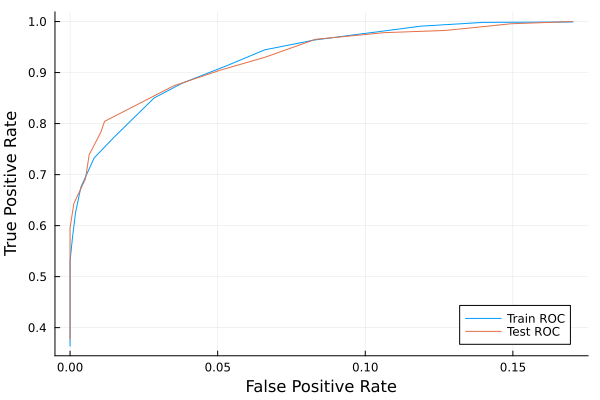

In [27]:
#=
(b.)
- ROC curve plots the performance of different classifier
- Y-axis is true positive rate, X-axis is false positive rate
- Give ROC plots for training and test data sets for 20 values of 'a' ranging from -0.3 to +0.3
=#

using LinearAlgebra, Statistics, Plots

# 20 'a' values from -0.3 to +0.3
a_values = range(-0.3,0.3, length=20)

# Stores true positive rate for training set for each 'a' value
tpr_train = Float64[]
# Stores false positive rate for training set for each 'a' value
fpr_train = Float64[]

# Stores true positive rate for test set for each 'a' value
tpr_test = Float64[]
# Stores false positive rate for test set for each 'a' value
fpr_test = Float64[]

# Go through all 'a' values
for a in a_values
    # Predictions for training and test data sets
    f_train = sign.(X_train * beta .+ v .- a)
    f_test  = sign.(X_test  * beta .+ v .- a)

    # Confusion matrix for training data set
    tp_training = sum((y_train .== 1) .& (f_train .== 1))
    fp_training = sum((y_train .== -1) .& (f_train .== 1))
    fn_training = sum((y_train .== 1) .& (f_train .== -1))
    tn_training = sum((y_train .== -1) .& (f_train .== -1))

    # Confusion matrix for test data set
    tp_test = sum((y_test .== 1) .& (f_test .== 1))
    fp_test = sum((y_test .== -1) .& (f_test .== 1))
    fn_test = sum((y_test .== 1) .& (f_test .== -1))
    tn_test = sum((y_test .== -1) .& (f_test .== -1))

    # Push our results for current 'a' value
    push!(tpr_train, tp_training / (tp_training + fn_training))
    push!(fpr_train, fp_training / (fp_training + tn_training))

    push!(tpr_test, tp_test / (tp_test + fn_test))
    push!(fpr_test, fp_test / (fp_test + tn_test))

end


# Plot ROC curves
plot(fpr_train, tpr_train, label="Train ROC", xlabel="False Positive Rate", ylabel="True Positive Rate")
plot!(fpr_test, tpr_test, label="Test ROC")

In [28]:
#=
17.1 - Portfolio Optimization
- Optimize a set of holdings to minimize risk for various average returns
- Using R_train, find asset allocation weights for the portfolios that minimize risk for
annualized returns of 10% and 20%.
- To obtain annualized return, multiply the daily return by P = 250 trading days
=#

In [1]:
# portfolio_data.jl
using Pkg
Pkg.add(["DataFrames", "CSV"])
using DataFrames, CSV
# Data frame object
df = CSV.read("asset_prices.csv", DataFrame)
# Each row is the day
# Each column is the asset
prices = Matrix(df)
# Asset names
asset_names = names(df)

# Computes price changes between consecutive days
p_changes = prices[2:end, :] .- prices[1:end-1, :]
# Copmutes returns (percentage change) between consecutive days
rets = p_changes ./ prices[1:end-1, :]
# Splits returns into training and test sets
R_train = rets[1:2000, :]
R_test = rets[2001:2500, :]
# Number of rows, columns in training and test sets
T_train, n = size(R_train)
T_test, n = size(R_test)
# Number of trading days in a year
P = 250

# T_train is number of days in training set
# T_test is number of days in test set
# 'n' is number of assets

   Resolving package versions...
  No Changes to `C:\Users\Jacks\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Jacks\.julia\environments\v1.11\Manifest.toml`


250

In [5]:
using VMLS
using Random, LinearAlgebra

# Minimize ||Rw - p1||^2
# Subject to 1^T W = 1
#            μ^T W = p


# Our annual goals
R_target_one = 0.1
R_target_two = 0.2

# Convert annualized return goal to a daily goal
# 'P' trading days a year (250)
p = R_target_one / P

# mean daily return for each asset
μ = vec(mean(R_train, dims=1))

# Constraints
C = [ones(1, n); μ']
# RHS of constraints
d = [1.0; p]      

# 'A' is 'R' matrix
A = R_train
# 'b' is p1
b = p .* ones(T_train)

# Calculate the weights
w_target_one = cls_solve(A, b, C, d)

20-element Vector{Float64}:
  0.03884960888873012
 -0.07776629166702945
 -0.008018498747139441
  0.04045589121732518
  0.10966457663549029
 -0.13489642365786608
  0.0227163870479709
  0.024607263078218245
  0.017645055778404094
 -0.11494439130741681
  0.07398448568478155
 -0.09495091139681626
 -0.04529053697105874
  0.1656924385728942
  0.08520337614060237
  0.08812656229003205
  0.036827316735580456
 -0.005001622349954384
  0.044393889456311536
  0.7327018245709402

In [6]:
# The annualized return on the training and test sets

# Daily portfolio returns
ret_train_one = R_train * w_target_one
ret_test_one  = R_test  * w_target_one

# Annualized return = mean daily return × 250
ann_return_train = mean(ret_train_one) * P
ann_return_test  = mean(ret_test_one)  * P

println("Annualized return (train): ", ann_return_train)
println("Annualized return (test):  ", ann_return_test)

Annualized return (train): 0.10000000000000006
Annualized return (test):  0.07606487872547511


In [7]:
# The annualized risk on the training and test sets

# Risk = stdev(daily returns) × √250
ann_risk_train = std(ret_train_one) * sqrt(P)
ann_risk_test  = std(ret_test_one)  * sqrt(P)

println("Annualized risk (train): ", ann_risk_train)
println("Annualized risk (test):  ", ann_risk_test)

Annualized risk (train): 0.08652346443919061
Annualized risk (test):  0.0713872692782648


In [8]:
# The asset with the minimum allocation weight (can be the most negative), and its weight

min_index = argmin(w_target_one)
println("Asset with minimum weight: ", asset_names[min_index],": ", w_target_one[min_index])

Asset with minimum weight: Cisco Systems, Inc.: -0.13489642365786608


In [9]:
# The asset with the maximum allocation weight, and its weight;

max_index = argmax(w_target_one)
println("Asset with maximum weight: ", asset_names[max_index],": ", w_target_one[max_index])

Asset with maximum weight: US Dollar: 0.7327018245709402


In [10]:
# The leverage

leverage = sum(abs.(w_target_one))
println("Leverage: ", leverage)

Leverage: 1.9617373521945625


In [11]:
# Now do it all over again with annual goal of 20% instead of 10%

# Convert annualized return goal to a daily goal
# 'P' trading days a year (250)
p = R_target_two / P

# mean daily return for each asset
μ = vec(mean(R_train, dims=1))

# Constraints
C = [ones(1, n); μ']
# RHS of constraints
d = [1.0; p]      

# 'A' is 'R' matrix
A = R_train
# 'b' is p1
b = p .* ones(T_train)

# Calculate the weights
w_target_two = cls_solve(A, b, C, d)

20-element Vector{Float64}:
  0.08201584098732381
 -0.16417328240818252
 -0.01692794179951742
  0.08540688145880242
  0.23151410623049212
 -0.284781338833289
  0.047956817101274474
  0.05194866649846361
  0.03725067330996606
 -0.24266038164900494
  0.15618946977899253
 -0.20045192405995685
 -0.09561335582779605
  0.34979514809835205
  0.17987379407461532
  0.1860449648345226
  0.07774655755289671
 -0.010558980516571025
  0.09372043329666252
  0.43570385187195376

In [12]:
# The annualized return on the training and test sets

# Daily portfolio returns
ret_train_two = R_train * w_target_two
ret_test_two  = R_test  * w_target_two

# Annualized return = mean daily return × 250
ann_return_train = mean(ret_train_two) * P
ann_return_test  = mean(ret_test_two)  * P

println("Annualized return (train): ", ann_return_train)
println("Annualized return (test):  ", ann_return_test)

Annualized return (train): 0.2000000000000001
Annualized return (test):  0.14947029953155486


In [13]:
# The annualized risk on the training and test sets

# Risk = stdev(daily returns) × √250
ann_risk_train = std(ret_train_two) * sqrt(P)
ann_risk_test  = std(ret_test_two)  * sqrt(P)

println("Annualized risk (train): ", ann_risk_train)
println("Annualized risk (test):  ", ann_risk_test)

Annualized risk (train): 0.18266064714941266
Annualized risk (test):  0.1507064573652341


In [14]:
# The asset with the minimum allocation weight (can be the most negative), and its weight

min_index = argmin(w_target_two)
println("Asset with minimum weight: ", asset_names[min_index],": ", w_target_two[min_index])

Asset with minimum weight: Cisco Systems, Inc.: -0.284781338833289


In [15]:
# The asset with the maximum allocation weight, and its weight;

max_index = argmax(w_target_two)
println("Asset with maximum weight: ", asset_names[max_index],": ", w_target_two[max_index])

Asset with maximum weight: US Dollar: 0.43570385187195376


In [16]:
# The leverage

leverage = sum(abs.(w_target_two))
println("Leverage: ", leverage)

Leverage: 3.0303344101886354


In [17]:
val_train_one = 1e4 .* cumprod(1 .+ ret_train_one)
val_test_one  = 1e4 .* cumprod(1 .+ ret_test_one)

val_train_two = 1e4 .* cumprod(1 .+ ret_train_two)
val_test_two  = 1e4 .* cumprod(1 .+ ret_test_two)

println("Day 2000 on training set, 10% target return: ", val_train_one[2000])
println("Day 500 on test set, 10% target return: ", val_test_one[500])
println("Day 2000 on training set, 20% target return: ", val_train_two[2000])
println("Day 500 on test set, 20% target return: ", val_test_two[500])

Day 2000 on training set, 10% target return: 21596.51699762076
Day 500 on test set, 10% target return: 11583.814237408169
Day 2000 on training set, 20% target return: 43330.789931321604
Day 500 on test set, 20% target return: 13181.213855952694


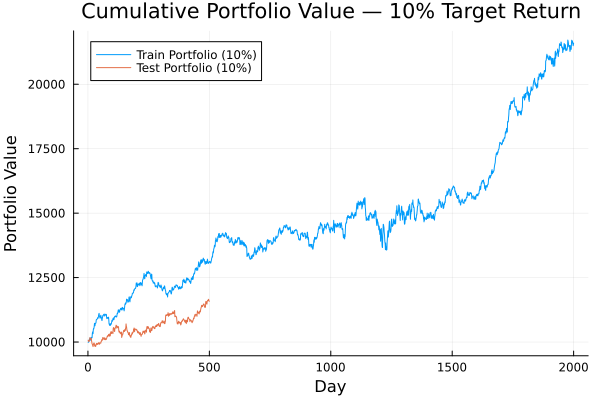

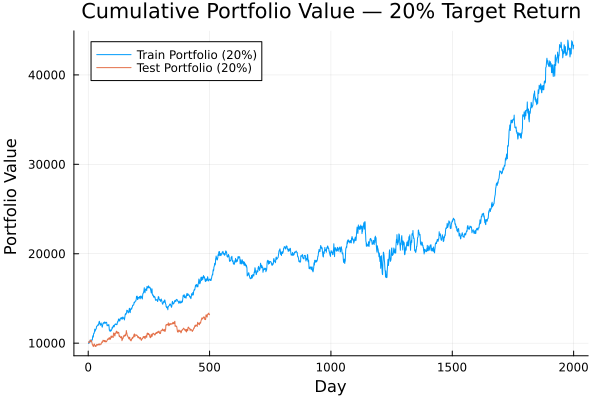

In [20]:
using Plots

# Plot for 10% Target Return
p1 = plot(val_train_one,
          label="Train Portfolio (10%)",
          xlabel="Day",
          ylabel="Portfolio Value",
          title="Cumulative Portfolio Value — 10% Target Return",
          yformatter=:plain)  # force whole numbers on y-axis

plot!(p1, val_test_one, label="Test Portfolio (10%)")
display(p1)

# Plot for 20% Target Return
p2 = plot(val_train_two,
          label="Train Portfolio (20%)",
          xlabel="Day",
          ylabel="Portfolio Value ",
          title="Cumulative Portfolio Value — 20% Target Return",
          yformatter=:plain)  # force whole numbers on y-axis

plot!(p2, val_test_two, label="Test Portfolio (20%)")
display(p2)

In [21]:
#=
17.2 - Rendezvous (Additional Exercies for Introduction to Applied Linear Algebra)
- Dynamics of 2 vehicles, given by
xt+1 = A*xt + B*ut
zt+1 = A*zt + B*vt

- n-vector xt is state of vehicle 1
- n-vector zt is state of vehicle 2

- m-vector ut is input of vehicle 1
- m-vector vt is input of vehicle 2

- nxn matrix 'A'
- nxm matrix 'B'

- C*xt is position of vehicle 1
- C*zt is position of vehicle 2

- 2xn matrix 'C'

Initial states of 2 vehicles are fixed and given
- x1 = xstart
- z1 = zstart

Want a sequence of inputs from t=1 to T-1 such that xT = zT

You get to select the u1 to ut-1 and v1 to vt-1 conditions

Among the choices of sequences that satisfy this condition, want the one that minimizes
the weighted sum of squares of the two vehicle inputs
=#

In [22]:
#=
(b.)
- The problem data "A", "B", "C", xstart, zstart are defined in rendezvous.jl
- Find u1,..., uT-1 and v1,...,vT-1 for lambda = 0.1, 1, 10
- Plot the trajectories (i.e., their positions_ for each lambda using the provided plotting code
=#

# Input: Force in "x" and "y" direction
# State: "x" position, "y" position, "x" velocity, "y" velocity

using Convex
using SCS
using LinearAlgebra
using Plots


# Number of time steps
T = 100
# How much each time step equals
h = 0.1
# Velocity decays exponentially at rate 0.1 (per second)
eta = 0.1
# Mass of vehicle
mass = 1
A = [1 0 h 0;
     0 1 0 h;
		 0 0 1-h*eta 0;
		 0 0 0 1-h*eta]
B = [0 0;
     0 0;
		 h 0;
		 0 h]
C = [Matrix(I, 2, 2)   zeros(2, 2)]
n = size(B,1); m = size(B,2)


# Initial state of vehicle 1 at t=1
# Initial x-position, y-position, x-velocity, y-velocity
x_init = [10; 10; 5; 0]
# Initial state of vehicle 2 at t=1
z_init = [0; 0; 0; -5]

# λ values
lambdas = [0.1, 1, 10]

# Store trajectories for plotting
x_trajectories = []
z_trajectories = []


# For each lambda
for λ in lambdas
    # Input matrix for vehicle 1
    u = Variable(m, T-1)
    # Input matrix for vehicle 2
    v = Variable(m, T-1)
    # State matrix for vehicle 1
    x = Variable(n, T)
    # State matrix for vehicle 2
    z = Variable(n, T)

    constraints = []

    # For each time step
    for t = 1:T-1
        # For each time step:
        # state vehicle 1 at t+1 = state vehicle 1 at t + vehicle 1 input
        # State of vehicle 2 at t+1 = state vehicle 2 at t + vehicle 2 input
        # Append these to contraints list
        push!(constraints, x[:,t+1] == A*x[:,t] + B*u[:,t])
        push!(constraints, z[:,t+1] == A*z[:,t] + B*v[:,t])
    end

    # Append intital conditions for vehicle 1 and vehicle 2
    # Append Rendezvous condition: final state both vehicles must have, which is that they...
    # ... are the same
    push!(constraints, x[:,1] == x_init)
    push!(constraints, z[:,1] == z_init)
    push!(constraints, x[:,T] == z[:,T])

    # Objective: weighted sum of squares
    # Pick control inputs for both vehciles so they meet at time "T", while using as little effort as possible
    #Penalize vehicle 2's input λ times more than vehicle 1's
    problem = minimize(sumsquares(u) + λ*sumsquares(v), constraints)

    # Solve
    solve!(problem, SCS.Optimizer)

    # Store "x" and "y" coordinates of both vehicles over time
    push!(x_trajectories, x.value[1:2, :])
    push!(z_trajectories, z.value[1:2, :])
end


# Plotting vehicles 1 and 2 for all lambda values
layers_list = []

# For each lambda value
for i in 1:length(lambdas)
    push!(layers_list,
        layer(x = x_trajectories[i][1,:],
              y = x_trajectories[i][2,:],
              Geom.line,
              color = ["Vehicle 1, λ=$(lambdas[i])" for _ in 1:T])
    )
    push!(layers_list,
        layer(x = z_trajectories[i][1,:],
              y = z_trajectories[i][2,:],
              Geom.line,
              color = ["Vehicle 2, λ=$(lambdas[i])" for _ in 1:T])
    )
end

p = plot(
    layers_list...,
    Guide.title("Vehicle Rendezvous Trajectories for Different λ"),
    Guide.xlabel("x position"),
    Guide.ylabel("y position")
)

------------------------------------------------------------------
	       SCS v3.2.9 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 1198, constraints m: 1204
cones: 	  z: primal zero / dual free vars: 804
	  q: soc vars: 400, qsize: 2
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
	  compiled with openmp parallelization enabled
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 2792, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.77e+01  1.08e+00  4.67e+01  3.16e+00  1.00e-01  8.63e-03 
   200| 3.06e-04  2.42e-05  8.46e-05  2.83

[ Info: [Convex.jl] Compilation finished: 11.56 seconds, 685.453 MiB of memory allocated


------------------------------------------------------------------
	       SCS v3.2.9 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 1198, constraints m: 1204
cones: 	  z: primal zero / dual free vars: 804
	  q: soc vars: 400, qsize: 2
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
	  compiled with openmp parallelization enabled
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 2792, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.77e+01  1.08e+00  6.66e+01 -6.71e+00  1.00e-01  7.83e-03 
   250| 2.02e-04  8.15e-07  2.01e-05  1.56

[ Info: [Convex.jl] Compilation finished: 0.02 seconds, 15.085 MiB of memory allocated
[ Info: [Convex.jl] Compilation finished: 0.03 seconds, 15.085 MiB of memory allocated


LoadError: UndefVarError: `layer` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [23]:
#=
17.6 State Feedback Control of the Longitudinal Motions of a Boeing 747 Aircraft
- Control of longitudinal motions of aircraft in steady level flight
- Altitude of 40000 ft
- Speed of 774 ft/s (528 MPH)
- Longitudinal: consider climb rate and speed (not turning or rolling motions)

- For modest deviations from these steady state (trim) conditions
dynnamics given by linear dynamical system
xt+1 = Axt + But

Deviations from the trim conditions (can't control)
xt1: velocity along airplane body axis
xt2: velocity perpendicular to body axis
xt3: angle of the body axis above horizontal
xt4: derivative of the angle of the body axis (pitch rate)

Deviations from the trim conditions (can control)
ut1: Elevator (control surface) angle
ut2: Engine thrust
=#

In [24]:
#=
(a.) - Open Loop Trajectory

- Simulate motion of plane with initial condition x1 = e4 in open-loop (ut = 0)
- Plot the state variables over time t=1 to 120
=#

# System matrices
A = [0.99  0.03  -0.02  -0.32;
     0.01  0.47   4.70   0.00;
     0.02 -0.06   0.40   0.00;
     0.01 -0.04   0.72   0.99]

B = [ 0.01  0.99;
     -3.44  1.66;
     -0.83  0.44;
     -0.47  0.25 ]


# Time in seconds
T = 120

# Matrix 'A'
# 2 is second dimension: columns
# Get number of columns from 'A'
n = size(A,2)

# dimensions of 'x' are 4 attributes * number of time steps
x = zeros(n,T)

# x1: First column, initial state at time t=1
# Setting x1 to e4 means last value in column is a 1
x[:,1] = [0.0, 0.0, 0.0, 1.0]   # x1 = e4 (pitch-rate deviation)


#xt+1 = Axt + But
# ut is zero
# xt+1 = Axt

for t in 1:(T-1)
    x[:, t+1] = A * x[:, t]
end

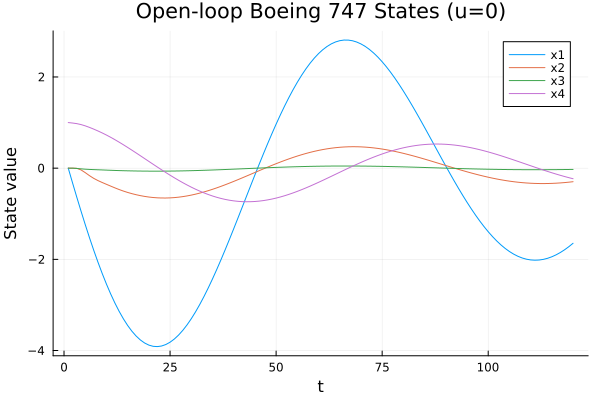

In [25]:
using Plots

# Time vector
taxis = 1:T

# Plot all four states on the same figure
plot(taxis, x[1,:], label="x1")
plot!(taxis, x[2,:], label="x2")
plot!(taxis, x[3,:], label="x3")
plot!(taxis, x[4,:], label="x4")

xlabel!("t")
ylabel!("State value")
title!("Open-loop Boeing 747 States (u=0)")

In [26]:
using LinearAlgebra

#=
(b.) - Linear Quadratic Control
- Solve linear qudratic control problem
- C = I, p = 100, T = 100
- Initial state x1 = e4
- Terminal state xdes = 0
=#

# Time is 100 seconds
T = 100

# State dimension
n = 4
# Input dimension
m = 2
# Weight on the input
# Large "p" means inputs are expensive: use small, gentle control
# Small "p" means inputs are cheap: Use agressive control
p = 100

# 4x4 identity matrix for multiplying by each state xt
# 4 since state dimension is 4
C = I(n)


# For getting dimensions of A~
# All "T" steps contribute 4 rows from state penalty of dimension 4
# T-1 steps conbriute 2 rows from input penalty of dimension 2
Atilde_rows = n*T + m*(T-1)
# Is a square
Atilde_cols = Atilde_rows

# Intialize A~ as zeros
Atilde = zeros(Atilde_rows, Atilde_cols)



# Fill diagonal blocks, starting in top left corner
# Keep track of current row/column index
current = 1

# place "T" copies of "C" (4x4) on the diagonal
for t in 1:T
    # Example:
    # Atilde[1:4, 1:4] = C
    Atilde[current:current+n-1, current:current+n-1] = C
    # Example:
    # Current is now 5
    current += n
end

# place T-1 copies of sqrt(p)*I (2x2) on the diagonal
for t in 1:T-1
    Atilde[current:current+m-1, current:current+m-1] = sqrt(p)*I(m)
    current += m
end



# For getting dimensions of C~
# xt+1 = Axt + But -> 0 = -xt+1 + Axt + But
# State dimension is 4, T-1 steps, 4(T-1) = 4T - 4
# x1 = e4, xT = 0 each contribute 4 rows
# 4T + 4 rows
Ctilde_rows = n*(T-1) + 2n
# 4T + 2(T-1) = 6T-2 columns
Ctilde_cols = n*T + m*(T-1)    

# Intialize C~ as zeros
Ctilde = zeros(Ctilde_rows, Ctilde_cols)


# Helper functions to compute starting column indices
# Example:
# t = 1 -> (1-1)*n + 1 = 1 -> x1 starts at column 1
# t = 2 -> (2-1)*n + 1 = 5 -> x2 starts at column 5
x_starting_col_func(t) = (t-1)*n + 1       # x_t block
# Example:
# t = 1 -> (4*100) + (1-1)*2 + 1 -> u1 starts just after all the x's
# t = 2 -> (4*100) + (2-1)*2 + 1 -> u2 starts after u1
u_starting_col_func(t) = n*T + (t-1)*m + 1 # u_t block


# Current row we are filling in
row = 1

# Dynamics constraints: -xt+1 + Axt + B ut = 0
# For each time step to T-1
for t in 1:(T-1)
    # Starting column for xt
    x_starting_col   = x_starting_col_func(t)
    # Starting column for xt+1
    x_plus_one_starting_col = x_starting_col_func(t+1)
    # Starting column for u1
    u_starting_col = u_starting_col_func(t)

    # For each row
    # 'x' starting column + 3 = A
    Ctilde[row:row+n-1, x_starting_col:x_starting_col+n-1] = A
    # x+1 starting column + 3 = -I
    Ctilde[row:row+n-1, x_plus_one_starting_col:x_plus_one_starting_col+n-1] = -I(n)
    # 'u' starting column + 1 = B
    Ctilde[row:row+n-1, u_starting_col:u_starting_col+m-1] = B 

    # Next row is 4 down
    row += n
end


# Initial condition: x1 = x_init
Ctilde[row:row+n-1, x_starting_col_func(1):x_starting_col_func(1)+n-1] = I(n)
row += n

# Terminal condition: xT = x_des
Ctilde[row:row+n-1, x_starting_col_func(T):x_starting_col_func(T)+n-1] = I(n)


# Initial state x1 = e4
x_init = zeros(n)
x_init[4] = 1.0

# Desired terminal state
x_des = zeros(n)

# d~ for c~x~ = d~
dtilde = zeros(Ctilde_rows)
# Last row is xdes which is 0
dtilde[end-n+1:end] .= x_des
# 2nd to last row is xinit which x1
dtilde[n*(T-1)+1:n*(T-1)+n] .= x_init


# Initialize x~ as zeros
# Matches column dimensions of A~ and C~
x_tilde = zeros(n*T + m*(T-1))


# Solve the constrained least-squares problem using normal equations
KKT_matrix = [2*Atilde'*Atilde  Ctilde';
              Ctilde             zeros(size(Ctilde,1), size(Ctilde,1))]

# C~ is (4T + 4) * (6T - 2)
# C~^T is (6T - 2) * (4T + 4)
# Want the rows from C~T * lambda for the rows of the zero matrix
# Rows from A~ are equivalent
# Dimensions of zero matrix: Rows from A~ * 1
rhs = [zeros(size(Atilde,1)); dtilde]

solution = KKT_matrix \ rhs

# Separate x~ values from lambda values
# From C~ * x~: rows of x~ have to match columns of C~
# Columns of C~ are again (6T - 2) which is the same as rows of A~
# Dimensions of x_tilde: Rows from A~ * 1
x_tilde = solution[1:size(Atilde,1)]

598-element Vector{Float64}:
 -7.105427357601002e-15
  1.7763568394002505e-15
  1.440927755364565e-15
  0.9999999999999005
 -0.3114381082024078
 -0.7879310108157114
 -0.18986239937139163
  0.882492873620933
 -0.5604960543837478
 -1.7715569235325201
 -0.15499918773189245
  0.6974018894350138
 -0.7658348907316146
  ⋮
  0.0002657186748797654
 -0.00020452623806088658
  0.0002930599616220739
 -0.00019208545226554762
  0.0002600739106521189
 -0.00015115603507582156
  0.00011900021513489829
 -5.959853279224546e-5
 -3.203880065326829e-5
  3.0752621471308964e-5
  0.00015464309422537136
 -5.231837039886812e-5

In [27]:
# 4 state variables * 120 seconds
X = zeros(n, 120)  # rows = state dim, columns = time
# 2 input variables * 120 seconds
U = zeros(m, 120) 
# Loops over each time step
for t in 1:T
    # Every 4 numbers in x_tilde corresponds to the 4 state variables for a single "X"
    X[:, t] = x_tilde[x_starting_col_func(t) : x_starting_col_func(t)+n-1]
end

# All the "U" values come immediately after all of the "X" values
for t in 1:(T-1)
    # Every 4 numbers in x_tilde corresponds to the 4 state variables for a single "U"
    U[:, t] = x_tilde[u_starting_col_func(t) : u_starting_col_func(t)+m-1]
end



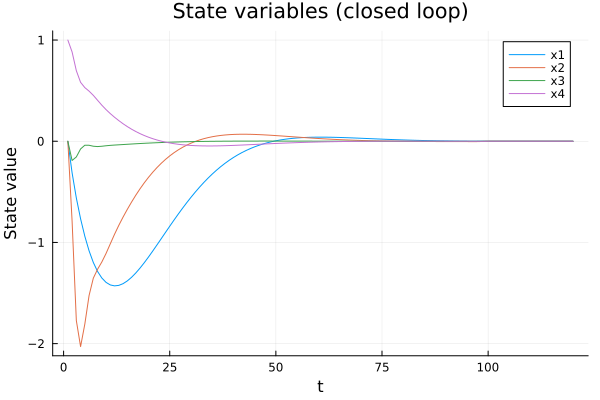

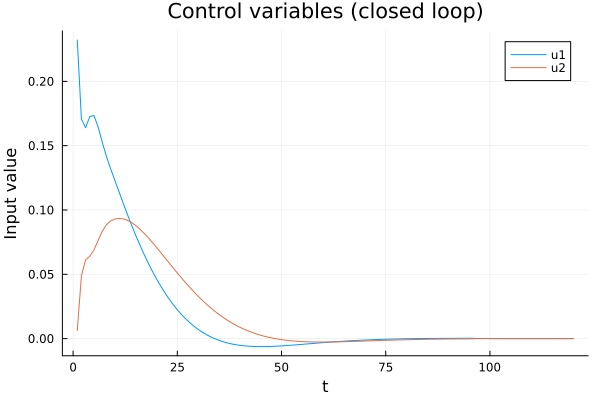

In [28]:
p1 = plot(1:120, X[1, :], label="x1", xlabel="t", ylabel="State value", title="State variables (closed loop)")
plot!(p1, 1:120, X[2, :], label="x2")
plot!(p1, 1:120, X[3, :], label="x3")
plot!(p1, 1:120, X[4, :], label="x4")
display(p1)  # explicitly show

p2 = plot(1:120, U[1, :], label="u1", xlabel="t", ylabel="Input value", title="Control variables (closed loop)")
plot!(p2, 1:120, U[2, :], label="u2")
display(p2)  # explicitly show

In [29]:
#=
(c.)
- Find the 2x4 state feedback gain "K" obtained by solving the linear qudratic control problem
with C = I, p = 100, T = 100.
- Verify it is almost the same for the one obtained with T = 50
=#

# D~ has same number of rows as C~, "n" columns for the 4 dimensions of x~
Dtilde = zeros(Ctilde_rows, n)
# Put 4x4 identity matrix in second to last spot
Dtilde[n*(T-1)+1 : n*(T-1)+n, :] .= I(n)

# rhs is not Dtilde instead of dtilde
rhs = [zeros(Atilde_rows, n); Dtilde]
XZtilde = KKT_matrix \ rhs

# Gets u1
K = XZtilde[n*T+1 : n*T+m, :]

println("2×4 state feedback gain K for T=100:")
println(K)



2×4 state feedback gain K for T=100:
[-0.03176922393357733 -0.01800813568534725 0.30709946383973935 0.23209176584990068; -0.05903498713424567 -0.003041304240805731 -0.11852420833496739 0.0063040142818908155]


In [30]:
# Time is 50 seconds
T = 50

# State dimension
n = 4
# Input dimension
m = 2
# Weight on the input
# Large "p" means inputs are expensive: use small, gentle control
# Small "p" means inputs are cheap: Use agressive control
p = 100

# 4x4 identity matrix for multiplying by each state xt
# 4 since state dimension is 4
C = I(n)


# For getting dimensions of A~
# All "T" steps contribute 4 rows from state penalty of dimension 4
# T-1 steps conbriute 2 rows from input penalty of dimension 2
Atilde_rows = n*T + m*(T-1)
# Is a square
Atilde_cols = Atilde_rows

# Intialize A~ as zeros
Atilde = zeros(Atilde_rows, Atilde_cols)



# Fill diagonal blocks, starting in top left corner
# Keep track of current row/column index
current = 1

# place "T" copies of "C" (4x4) on the diagonal
for t in 1:T
    # Example:
    # Atilde[1:4, 1:4] = C
    Atilde[current:current+n-1, current:current+n-1] = C
    # Example:
    # Current is now 5
    current += n
end

# place T-1 copies of sqrt(p)*I (2x2) on the diagonal
for t in 1:T-1
    Atilde[current:current+m-1, current:current+m-1] = sqrt(p)*I(m)
    current += m
end



# For getting dimensions of C~
# xt+1 = Axt + But -> 0 = -xt+1 + Axt + But
# State dimension is 4, T-1 steps, 4(T-1) = 4T - 4
# x1 = e4, xT = 0 each contribute 4 rows
# 4T + 4 rows
Ctilde_rows = n*(T-1) + 2n
# 4T + 2(T-1) = 6T-2 columns
Ctilde_cols = n*T + m*(T-1)    

# Intialize C~ as zeros
Ctilde = zeros(Ctilde_rows, Ctilde_cols)


# Helper functions to compute starting column indices
# Example:
# t = 1 -> (1-1)*n + 1 = 1 -> x1 starts at column 1
# t = 2 -> (2-1)*n + 1 = 5 -> x2 starts at column 5
x_starting_col_func(t) = (t-1)*n + 1       # x_t block
# Example:
# t = 1 -> (4*100) + (1-1)*2 + 1 -> u1 starts just after all the x's
# t = 2 -> (4*100) + (2-1)*2 + 1 -> u2 starts after u1
u_starting_col_func(t) = n*T + (t-1)*m + 1 # u_t block


# Current row we are filling in
row = 1

# Dynamics constraints: -xt+1 + Axt + B ut = 0
# For each time step to T-1
for t in 1:(T-1)
    # Starting column for xt
    x_starting_col   = x_starting_col_func(t)
    # Starting column for xt+1
    x_plus_one_starting_col = x_starting_col_func(t+1)
    # Starting column for u1
    u_starting_col = u_starting_col_func(t)

    # For each row
    # 'x' starting column + 3 = A
    Ctilde[row:row+n-1, x_starting_col:x_starting_col+n-1] = A
    # x+1 starting column + 3 = -I
    Ctilde[row:row+n-1, x_plus_one_starting_col:x_plus_one_starting_col+n-1] = -I(n)
    # 'u' starting column + 1 = B
    Ctilde[row:row+n-1, u_starting_col:u_starting_col+m-1] = B 

    # Next row is 4 down
    row += n
end


# Initial condition: x1 = x_init
Ctilde[row:row+n-1, x_starting_col_func(1):x_starting_col_func(1)+n-1] = I(n)
row += n

# Terminal condition: xT = x_des
Ctilde[row:row+n-1, x_starting_col_func(T):x_starting_col_func(T)+n-1] = I(n)


# Initial state x1 = e4
x_init = zeros(n)
x_init[4] = 1.0

# Desired terminal state
x_des = zeros(n)

# d~ for c~x~ = d~
dtilde = zeros(Ctilde_rows)
# Last row is xdes which is 0
dtilde[end-n+1:end] .= x_des
# 2nd to last row is xinit which x1
dtilde[n*(T-1)+1:n*(T-1)+n] .= x_init


# Initialize x~ as zeros
# Matches column dimensions of A~ and C~
x_tilde = zeros(n*T + m*(T-1))


# Solve the constrained least-squares problem using normal equations
KKT_matrix = [2*Atilde'*Atilde  Ctilde';
              Ctilde             zeros(size(Ctilde,1), size(Ctilde,1))]

# C~ is (4T + 4) * (6T - 2)
# C~^T is (6T - 2) * (4T + 4)
# Want the rows from C~T * lambda for the rows of the zero matrix
# Rows from A~ are equivalent
# Dimensions of zero matrix: Rows from A~ * 1
rhs = [zeros(size(Atilde,1)); dtilde]

solution = KKT_matrix \ rhs

# Separate x~ values from lambda values
# From C~ * x~: rows of x~ have to match columns of C~
# Columns of C~ are again (6T - 2) which is the same as rows of A~
# Dimensions of x_tilde: Rows from A~ * 1
x_tilde = solution[1:size(Atilde,1)]


# D~ has same number of rows as C~, "n" columns for the 4 dimensions of x~
Dtilde = zeros(Ctilde_rows, n)
# Put 4x4 identity matrix in second to last spot
Dtilde[n*(T-1)+1 : n*(T-1)+n, :] .= I(n)

# rhs is not Dtilde instead of dtilde
rhs = [zeros(Atilde_rows, n); Dtilde]
XZtilde = KKT_matrix \ rhs

# Gets u1
K = XZtilde[n*T+1 : n*T+m, :]

println("2×4 state feedback gain K for T=50:")
println(K)

2×4 state feedback gain K for T=50:
[-0.031793534439237256 -0.018048193036641208 0.30718336546866853 0.23246862155581005; -0.05915843998537812 -0.003021001506273926 -0.11855451935689239 0.0061141873029379925]


In [31]:
#=
(d.) 
- Simulate motion of plane
# Initial condition x1 = e4
- Under state feedback control (ut = Kxt)
=#

# System matrices
A = [0.99  0.03  -0.02  -0.32;
     0.01  0.47   4.70   0.00;
     0.02 -0.06   0.40   0.00;
     0.01 -0.04   0.72   0.99]

B = [ 0.01  0.99;
     -3.44  1.66;
     -0.83  0.44;
     -0.47  0.25 ]


# Time in seconds
T = 120

# 4 state dimensions
n = 4
# 2 input dimensions
m = 2

# dimensions of 'X' are 4 attributes * number of time steps
X = zeros(n,T)

# dimensions of 'U' are 2 attributes * number of time steps
U = zeros(m,T)

# X1: First column, initial state at time t=1
# Setting x1 to e4 means last value in column is a 1
X[:,1] = [0.0, 0.0, 0.0, 1.0]   # x1 = e4 (pitch-rate deviation)


#xt+1 = Axt + But
# ut is zero
# xt+1 = Axt

for t in 1:(T-1)
    # ut = K * xt
    u = K * X[:,t]
    # Store ut
    U[:,t] = u
    # xt+1 = Axt + But
    X[:, t+1] = A*X[:,t] + B*u
end

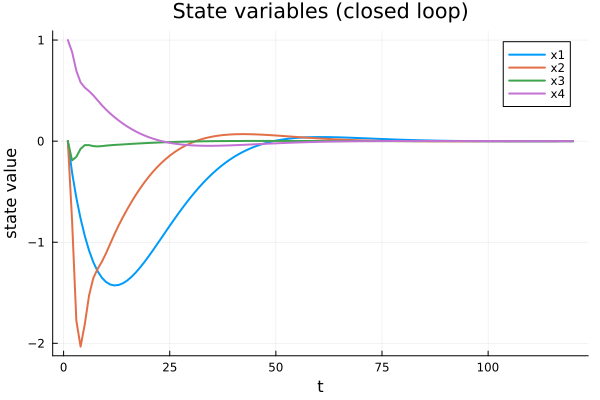

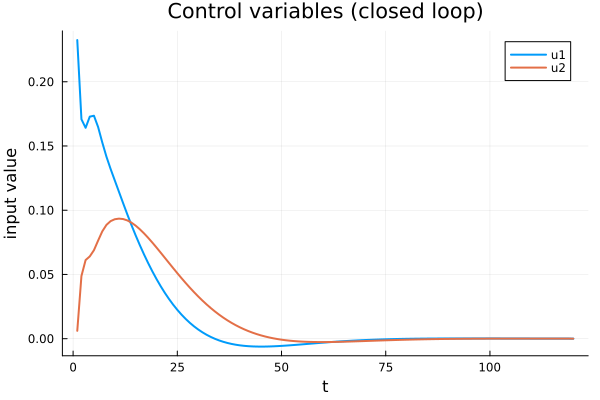

In [32]:
using Plots

t = 1:120

# Plot states
p_states = plot(t, X',
    xlabel="t",
    ylabel="state value",
    title="State variables (closed loop)",
    label=["x1" "x2" "x3" "x4"],
    linewidth=2)

display(p_states)



# Plot inputs
p_inputs = plot(t, U',                  
    xlabel="t",
    ylabel="input value",
    title="Control variables (closed loop)",
    label=["u1" "u2"],
    linewidth=2)

display(p_inputs)

In [33]:
#=
14.10 - One-versus-one Multi-class Classifier

(a.)
- Construct one-versus-one classifier
- construct least squares classifier
- Find confusion matrices, error rates of 2 classifiers on both training and test data sets
=#
import Pkg
Pkg.add("RDatasets")


   Resolving package versions...
  No Changes to `C:\Users\Jacks\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Jacks\.julia\environments\v1.11\Manifest.toml`


In [34]:
using RDatasets

# Load the Iris dataset from the "datasets" package
iris = dataset("datasets", "iris")

# Extract features and convert them to a matrix
x = Matrix(iris[:, 1:4])

# Extract species of all flowers
y = iris[:, 5]

# For storing number version of each species
y_int = zeros(Int, length(y))

# Give each species a number
for i in 1:(length(y))
    if y[i] == "setosa"
        y_int[i] = 1
    elseif y[i] == "versicolor"
        y_int[i] = 2
    elseif y[i] == "virginica"
        y_int[i] = 3
    end
end

y = y_int

150-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

In [35]:
using Random

# For reproducibility
Random.seed!(42)

# Size of the dataset
n = size(x, 1)
# Puts the numbers 1 to 150 in a random order
perm = randperm(n)


# 70% of samples will be used for training
train_frac = 0.7


# Rounds to nearest whole number (not necessary here)
n_train = Int(round(train_frac*n))


# All of the indexes that will be trained on
train_idx = perm[1:n_train]
# All of the indexes that will be tested on
test_idx = perm[n_train+1:end]


# All of the feature vectors used for training
x_train = x[train_idx, :]
# All of the labels used for training
y_train = y[train_idx]


# All of the feature vectors used for testing
x_test = x[test_idx, :]
# All of the labels used for testing
y_test = y[test_idx]

45-element Vector{Int64}:
 3
 1
 3
 3
 3
 1
 1
 2
 3
 1
 3
 2
 1
 ⋮
 3
 3
 1
 3
 2
 3
 2
 2
 3
 3
 2
 2

In [36]:
# Number of classes
K = 3


# 1. One-hot Encoding
K = 3  # number of classes


# Number of elements we are training on
n_train = length(y_train)


# One row per training sample, one column per class
# training samples x classes
# Sets all values to zero
y_train_hot_encoded = zeros(n_train, K)

# Using One-hot
# Goes through samples
for i in 1:n_train
    # y_train[i] is the class label for sample "i"
    # Set the column corresponding to the class the flower is in to 1
    y_train_hot_encoded[i, y_train[i]] = 1.0
    # println(y_train_hot_encoded[i,:])
end



# Add a bias term (column of 1s)
xb_train = hcat(x_train, ones(size(x_train, 1)))
xb_test  = hcat(x_test,  ones(size(x_test, 1)))

# Solve least-squares "W"
# "W" is the weights
# 5x3
# Rows 1-4 are the weights for each feature, columns 1-3 are the 3 classes, row 5 is bias terms
W = xb_train \ y_train_hot_encoded



# Prediction function
function predict_least_squares(x, W)
    # Number of classes
    # 2 means dimension 2 of "W" which is columns. Number of columns is number of classes
    num_classes = size(W,2)

    # Number of weights
    # Last weight is the bias
    # 1 means row dimension. This is number of weights + 1 for the bias
    num_weights = size(W,1)

    # Stores the score of the best class
    max_score = -1

    # Stores which class is the best
    best_class = -1

    # Loop through each class
    for curr_class in 1:num_classes

        # Current score of current class
        curr_score = 0
        
        # Loop through all weights, multiplying them by value of current data point
        for curr_weight in 1:num_weights
            # Stores score of current class
        
            # Multiplies feature of current data point by weight
            curr_score += x[curr_weight] * W[curr_weight, curr_class]
        end

        # If we have a new best class
        if(curr_score > max_score)
            max_score = curr_score
            best_class = curr_class
        end
        
        #println("Nice: ", best_class)
    end
    
    return best_class
end


# Predict on train/test data sets
yhat_train = zeros(Int, size(xb_train, 1))
yhat_test = zeros(Int, size(xb_test, 1))

for i in 1:size(x_train,1)
    yhat_train[i] = predict_least_squares(xb_train[i, :], W)
end
    
for i in 1:size(x_test,1)
    yhat_test[i] = predict_least_squares(xb_test[i, :], W)
end



In [37]:
# Intializing confusion matrix for training data set (K x K)
conf_matrix_train = zeros(Int, K, K)

# Creating the confusion matrix
# For each image
for i in 1:length(y_train)
    # Store true label
    true_class_train = y_train[i]
    # Store predicted label
    pred_class_train = yhat_train[i]

    # Add 1 to that combination of true label and predicted label
    conf_matrix_train[true_class_train, pred_class_train] += 1
end

println("Training Set Confusion Matrix (Least Squares Classifier)")
println("Rows are true. Columns are predicted.")

println("   se ve vi")

for i in 1:K
    if i == 1
        print("se ")
    elseif i == 2
        print("ve ")
    elseif i == 3
        print("vi ")
    end
    for j in 1:K
        print(conf_matrix_train[i, j], " ")
    end
    println()  # new line after each row
end



# Intializing confusion matrix for test data set (K x K)
conf_matrix_test = zeros(Int, K, K)

# Creating the confusion matrix
# For each image
for i in 1:length(y_test)
    # Store true label
    true_class_test = y_test[i]
    # Store predicted label
    pred_class_test = yhat_test[i]

    # Add 1 to that combination of true label and predicted label
    conf_matrix_test[true_class_test, pred_class_test] += 1
end

println("")
println("Test Set Confusion Matrix (Least Squares Classifier)")
println("Rows are true. Columns are predicted.")

println("   se ve vi")

for i in 1:K
    if i == 1
        print("se ")
    elseif i == 2
        print("ve ")
    elseif i == 3
        print("vi ")
    end
    for j in 1:K
        print(conf_matrix_test[i, j], " ")
    end
    println()  # new line after each row
end

println("")

# Error rate for training data set
err_train = sum(y_train .!= yhat_train) / length(y_train)
println("Error rate training: ", err_train)
# Error rate for test data set
err_test = sum(y_test .!= yhat_test) / length(y_test)
println("Error rate testing: ", err_test)

println("")

println("Training error rate is larger than test error rate. Small dataset causing this?")

Training Set Confusion Matrix (Least Squares Classifier)
Rows are true. Columns are predicted.
   se ve vi
se 35 0 0 
ve 0 29 10 
vi 0 8 23 

Test Set Confusion Matrix (Least Squares Classifier)
Rows are true. Columns are predicted.
   se ve vi
se 14 1 0 
ve 0 9 2 
vi 0 2 17 

Error rate training: 0.17142857142857143
Error rate testing: 0.1111111111111111

Training error rate is larger than test error rate. Small dataset causing this?


In [38]:
# Trains a binary last-squares classifier for two classes
# x: feature matrix. Rows are samples, columns are features
# y: vector of labels
function train_binary_least_squares(x, y, class_i, class_j)
    # Find index of all samples that belong to either class_i or class_j or both
    indices = findall((y .== class_i) .| (y .== class_j))

    # Feature vectors
    x_pair = x[indices, :]
    # Labels
    y_pair = y[indices]


    # Stores +1 or -1 labels
    y_bin = zeros(Float64, length(y_pair))
    
    # Loop through each element of y_pair
    for i in 1:length(y_pair)
        # If belongs to class_i
        if y_pair[i] == class_i
            # Label it a +1
            y_bin[i] = 1.0
        # If it belongs to class_j
        else
            # Label it a -1
            y_bin[i] = -1.0
        end
    end


    # Solve least-squares for the weights
    W = x_pair \ y_bin
    
    return W
end

train_binary_least_squares (generic function with 1 method)

In [39]:
# x: feature vector
# W: weight vector
function predict_binary_least_squares(xb, W)
    # Add a 1 which will be multiplied by the bias
    #xb = vcat(x, 1.0)
    #println("xb: ", xb)

    # Stores score of the classifier
    score = 0.0

    # Loops through each feature
    for i in 1:length(xb)
        # Multiplies feature by weight
        # Adds to total score
        score += xb[i] * W[i]
    end

    # Greater than 0, class_i
    if score >= 0
        return 1
    # Less than 0, class_j
    else
        return -1
    end
end

predict_binary_least_squares (generic function with 1 method)

In [40]:
# This code gets the weights for each class pair


# 3 different flower types
classes = [1,2,3]

# Empty list to store [[class_i, class_j], weights]
pairwise_weights = []

# Class_i
for i in 1:length(classes)-1
    # class_j
    for j in i+1:length(classes)
        class_i = classes[i]
        class_j = classes[j]

        # Retrieve the weights for this pair
        #print(xb_train)
        W = train_binary_least_squares(xb_train, y_train, class_i, class_j)
        #println("Weights: ", W)
        push!(pairwise_weights, [[class_i, class_j], W[:]])
    end
end


In [41]:
function predict_one_versus_one(x, pairwise_weights)
    # Stores number of votes for each class
    votes = []


    # Start each class at 0 votes
    for i in 1:length(pairwise_weights)
        push!(votes, [i, 0])
    end

    
    # Go through all pairs
    for k in 1:length(pairwise_weights)
        # class_i and class_j
        i = Int(pairwise_weights[k][1][1])
        #println("class_i: ", i)
        j = Int(pairwise_weights[k][1][2])
        #println("class_j: ", j)
        #println("Weights:", pairwise_weights[k][2])
        # Use the weights from this combination of class_i and class_j to make a prediction
        pred = predict_binary_least_squares(x, pairwise_weights[k][2])
        #pred = 1
        
        # +1 prediction means class_i
        if pred == 1
            votes[i][2] += 1
        # -1 prediction means class_j
        else
            votes[j][2] += 1
        end
    end

    #println("Votes: ", votes)
    #println("Votes[1]: ", votes[1][1])
    #println("Votes[2]: ", votes[2][1])
    #println("Votes[3]: ", votes[3][1])

    
    # Stores the class with the most votes
    class_prediction = -1

    # Stores the most votes value
    most_votes = -1

    
    # Goes through all class choices
    for i in 1:length(pairwise_weights)
        # If current class has more votes than the class with the most votes
        if votes[i][2] > most_votes
            # Update class with most votes
            class_prediction = votes[i][1]
            # Update the most votes value
            most_votes = votes[i][2]
        end
    end

    #println("Class with most votes: ", class_prediction)
    #println("Amount votes: ", most_votes)

    return class_prediction
        
end

predict_one_versus_one (generic function with 1 method)

In [42]:
#print(pairwise_weights)
#predict_one_versus_one(xb_train[1, :], pairwise_weights)


# Allocate space for predictions for both training and test data sets
yhat_train = zeros(Int, size(xb_train, 1))
yhat_test = zeros(Int, size(xb_test, 1))


# Goes through each feature vector
for i in 1:size(xb_train, 1)
    # Make the class prediction
    yhat_train[i] = predict_one_versus_one(xb_train[i, :], pairwise_weights)
end


 # Goes through each feature vector
for i in 1:size(xb_test, 1)
    # Make the class prediction
    yhat_test[i] = predict_one_versus_one(xb_test[i, :], pairwise_weights)   
end


In [43]:
# Intializing confusion matrix for training data set (K x K)
conf_matrix_train = zeros(Int, K, K)

# Creating the confusion matrix
# For each image
for i in 1:length(y_train)
    # Store true label
    true_class_train = y_train[i]
    # Store predicted label
    pred_class_train = yhat_train[i]

    # Add 1 to that combination of true label and predicted label
    conf_matrix_train[true_class_train, pred_class_train] += 1
end

println("Training Set Confusion Matrix (One-versus-one Classifier)")
println("Rows are true. Columns are predicted.")

println("   se ve vi")

for i in 1:K
    if i == 1
        print("se ")
    elseif i == 2
        print("ve ")
    elseif i == 3
        print("vi ")
    end
    for j in 1:K
        print(conf_matrix_train[i, j], " ")
    end
    println()  # new line after each row
end



# Intializing confusion matrix for test data set (K x K)
conf_matrix_test = zeros(Int, K, K)

# Creating the confusion matrix
# For each image
for i in 1:length(y_test)
    # Store true label
    true_class_test = y_test[i]
    # Store predicted label
    pred_class_test = yhat_test[i]

    # Add 1 to that combination of true label and predicted label
    conf_matrix_test[true_class_test, pred_class_test] += 1
end

println("")
println("Test Set Confusion Matrix (One-versus-one Classifier)")
println("Rows are true. Columns are predicted.")

println("   se ve vi")

for i in 1:K
    if i == 1
        print("se ")
    elseif i == 2
        print("ve ")
    elseif i == 3
        print("vi ")
    end
    for j in 1:K
        print(conf_matrix_test[i, j], " ")
    end
    println()  # new line after each row
end

println("")

# Error rate for training data set
err_train = sum(y_train .!= yhat_train) / length(y_train)
println("Error rate training: ", err_train)
# Error rate for test data set
err_test = sum(y_test .!= yhat_test) / length(y_test)
println("Error rate testing: ", err_test)

println("")

println("Error rates look really good")

Training Set Confusion Matrix (One-versus-one Classifier)
Rows are true. Columns are predicted.
   se ve vi
se 35 0 0 
ve 0 38 1 
vi 0 0 31 

Test Set Confusion Matrix (One-versus-one Classifier)
Rows are true. Columns are predicted.
   se ve vi
se 15 0 0 
ve 0 11 0 
vi 0 1 18 

Error rate training: 0.009523809523809525
Error rate testing: 0.022222222222222223

Error rates look really good
